Stock Prediction :
Take stock price of any company you
want and predicts its price by using LSTM.
Use only Jupyter notebook code.

Dataset used:

https://github.com/SyedAbdallahA/BharatDSintern/blob/main/stock_price_data.csv

Epoch 1/10
38/38 [==============================] - 11s 20ms/step - loss: 0.0133
Epoch 2/10
38/38 [==============================] - 1s 17ms/step - loss: 2.7285e-04
Epoch 3/10
38/38 [==============================] - 0s 13ms/step - loss: 1.5512e-04
Epoch 4/10
38/38 [==============================] - 1s 15ms/step - loss: 1.4480e-04
Epoch 5/10
38/38 [==============================] - 1s 22ms/step - loss: 1.4334e-04
Epoch 6/10
38/38 [==============================] - 1s 19ms/step - loss: 1.3759e-04
Epoch 7/10
38/38 [==============================] - 1s 16ms/step - loss: 1.3961e-04
Epoch 8/10
38/38 [==============================] - 1s 16ms/step - loss: 1.3642e-04
Epoch 9/10
38/38 [==============================] - 1s 15ms/step - loss: 1.3942e-04
Epoch 10/10
38/38 [==============================] - 1s 16ms/step - loss: 1.4094e-04
Training Loss: 0.0002
Test Loss: 0.0005
10/10 [==============================] - 1s 2ms/step


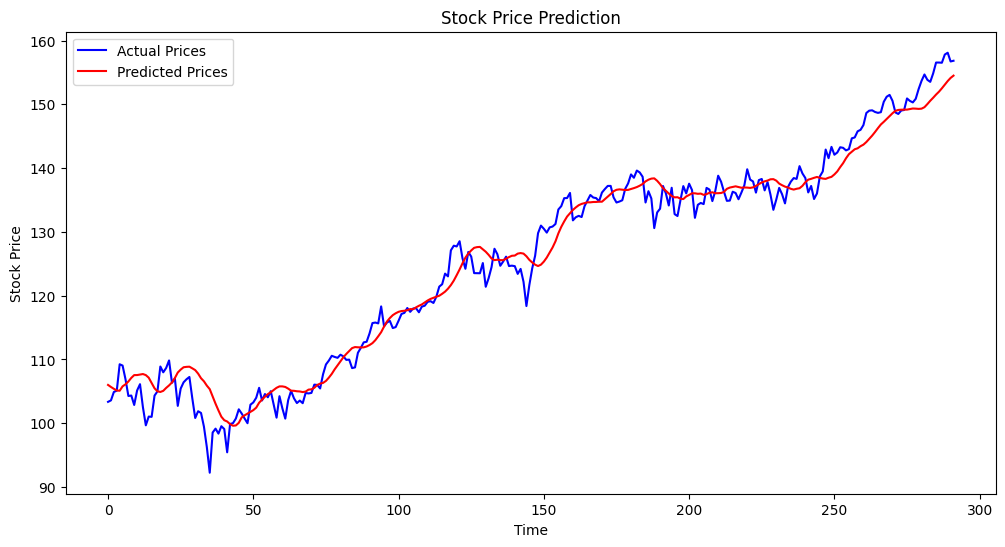

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Load historical stock price data (you should have a CSV file)
data = pd.read_csv('stock_price_data.csv')  # Replace 'stock_price_data.csv' with your data file

# Select the 'Close' price column for prediction
data = data[['Close']]

# Normalize the data
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Define a function to prepare data for training
def prepare_data(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Set the sequence length and split the data into training and testing sets
seq_length = 10
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

X_train, y_train = prepare_data(train_data.values, seq_length)
X_test, y_test = prepare_data(test_data.values, seq_length)

# Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Training Loss: {train_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Predict stock prices
predicted_stock_prices = model.predict(X_test)

# Inverse transform the predicted prices to the original scale
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)
y_test = scaler.inverse_transform(y_test)

# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(predicted_stock_prices, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
